<div style="background-image: linear-gradient(to right, #4b4cff , #00d4ff); text-align: center; padding: 50px;">
  <h1 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size: 48px; color: white; text-shadow: 2px 2px #4b4cff;">
    Lol Data Analysis
  </h1>
</div>

![Summoner Rift](Summoner%20Rift.png)

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Library
</h2>

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import random
from PIL import Image, ImageDraw
import numpy as np
from riotwatcher import LolWatcher, ApiError
import requests
from io import BytesIO
from IPython.display import display, HTML

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
API exploitation
</h2>

In [54]:
lol_watcher = LolWatcher("your-API-Key")

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Summoner Icon Printing
</h2>

<h3 style="color:#c38d9e; font-family: Arial, sans-serif; font-size: 24px; margin-top: 40px; text-align: center;">
Print_icon
</h3>

In [55]:
def print_icon(summoner, region) : 
    versions = lol_watcher.data_dragon.versions_for_region(region)
    latest_version = versions['n']['profileicon']

    icon_id = summoner['profileIconId']
    icon_url = f'http://ddragon.leagueoflegends.com/cdn/{latest_version}/img/profileicon/{icon_id}.png'

    response = requests.get(icon_url)
    img = Image.open(BytesIO(response.content))
    display(img)

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Get champion by ID
</h2>

<h3 style="color:#c38d9e; font-family: Arial, sans-serif; font-size: 24px; margin-top: 40px; text-align: center;">
get_champion_name
</h3>

In [56]:
def get_champion_name(champion_id, region):
    versions = lol_watcher.data_dragon.versions_for_region(region)
    latest_version = versions['n']['champion']

    url = f"http://ddragon.leagueoflegends.com/cdn/{latest_version}/data/en_US/champion.json"
    response = requests.get(url)

    champions_data = response.json()

    for champion in champions_data["data"].values():
        if champion["key"] == str(champion_id):
            name = champion["name"]
            
    return name

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Get Masterise level and Points
</h2>

<h3 style="color:#c38d9e; font-family: Arial, sans-serif; font-size: 24px; margin-top: 40px; text-align: center;">
get_champion_masterise
</h3>

In [57]:
def get_champion_masterise(summoner, region) : 
    summoner_id = summoner["id"]
    champions = lol_watcher.champion_mastery.by_summoner(region, summoner_id)

    champions_masterise = []

    for champ in champions : 
        champions_ID = champ['championId']
        champion_name = get_champion_name(champions_ID, region)
        champion_level = champ["championLevel"]
        champion_points = champ["championPoints"]
        # print(f"{champion_name}: niveau {champion_level}, {champion_points} points de maîtrise")
        champions_masterise.append({"champion_name": champion_name, "champion_level": champion_level, "champion_points": champion_points})
    
    return pd.DataFrame(champions_masterise)

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Get and print top 5 masterise champions
</h2>

<h3 style="color:#c38d9e; font-family: Arial, sans-serif; font-size: 24px; margin-top: 40px; text-align: center;">
print_champ_masterise
</h3>

In [58]:
def print_champ_masterise(summoner, region) : 
    champions = get_champion_masterise(summoner, region)
    versions = lol_watcher.data_dragon.versions_for_region(region)
    latest_version = versions['n']['champion']

    for i in range (5) : 
        tmp = champions.loc[i]
        name = tmp['champion_name']
        points = tmp['champion_points']
        level = tmp['champion_level']

    
        if "'" in name : 
            name = name.replace("'", "")
            name = name.lower().capitalize()
        
        if ' ' in name:
            name = name.replace(" ", "")
        else : 
            name = name.lower().capitalize()
        

        response = requests.get(f'http://ddragon.leagueoflegends.com/cdn/{latest_version}/img/champion/{name}.png')
        img = Image.open(BytesIO(response.content))
        display(img)

        print(f"{name} : \n - Masterise -> {level}  \n - Masterise Points -> {points}")
        print("-----------------------------------------------------------------------------")

<h3 style="color:#c38d9e; font-family: Arial, sans-serif; font-size: 24px; margin-top: 40px; text-align: center;">
print_all_champ_masterise
</h3>

In [59]:
def print_all_champ_masterise(summoner, region) : 
    champions = get_champion_masterise(summoner)
    versions = lol_watcher.data_dragon.versions_for_region(region)
    latest_version = versions['n']['champion']

    for i in range (len(champions)) : 
        tmp = champions.loc[i]
        name = tmp['champion_name']
        points = tmp['champion_points']
        level = tmp['champion_level']

        if ' ' in name:
            name = name.replace(" ", "")
        else : 
            name = name.lower().capitalize()

        response = requests.get(f'http://ddragon.leagueoflegends.com/cdn/{latest_version}/img/champion/{name}.png')
        img = Image.open(BytesIO(response.content))
        display(img)

        print(f"{name} : \n - Masterise -> {level}  \n - Masterise Points -> {points}")
        print("-----------------------------------------------------------------------------")

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Actual Rank
</h2>

<h3 style="color:#c38d9e; font-family: Arial, sans-serif; font-size: 24px; margin-top: 40px; text-align: center;">
get_rank_solo_duo
</h3>

In [60]:
def get_rank_solo_duo(summoner, region) : 
    my_ranked_stats = lol_watcher.league.by_summoner(region, summoner['id'])

    values = {}
    for queue in my_ranked_stats:
        if queue["queueType"] == "RANKED_SOLO_5x5":
            values['tier'] = queue['tier']
            values['rank'] = queue['rank']
            values['lp'] = queue['leaguePoints']
            values['wins'] = queue['wins']
            values['losses'] = queue['losses']
            values['win_rate'] = values['wins'] / (values['wins'] + values['losses'])
            #print(f"{tier} {rank} ({lp} LP) - {wins}W/{losses}L ({win_rate:.2%} WR)")

            break
    else:
        print("Le joueur n'a pas encore joué de parties classées.")

    return pd.DataFrame.from_dict(values, orient='index').T

<h3 style="color:#c38d9e; font-family: Arial, sans-serif; font-size: 24px; margin-top: 40px; text-align: center;">
get_rank_flex
</h3>

In [61]:
def get_rank_flex(summoner, region) : 
    my_ranked_stats = lol_watcher.league.by_summoner(region, summoner['id'])

    values = {}
    for queue in my_ranked_stats:
        if queue["queueType"] == "RANKED_FLEX_SR":
            values['tier'] = queue['tier']
            values['rank'] = queue['rank']
            values['lp'] = queue['leaguePoints']
            values['wins'] = queue['wins']
            values['losses'] = queue['losses']
            values['win_rate'] = values['wins'] / (values['wins'] + values['losses'])
            #print(f"{tier} {rank} ({lp} LP) - {wins}W/{losses}L ({win_rate:.2%} WR)")

            break
    else:
        print("Le joueur n'a pas encore joué de parties classées.")

    return pd.DataFrame.from_dict(values, orient='index').T

<h3 style="color:#c38d9e; font-family: Arial, sans-serif; font-size: 24px; margin-top: 40px; text-align: center;">
print_rank_solo_duo
</h3>

In [62]:
def print_rank_solo_duo(summoner, region) : 
    rank_data = get_rank_solo_duo(summoner, region)
    versions = lol_watcher.data_dragon.versions_for_region(region)

    tier = str(rank_data['tier'][0]).lower().capitalize()
    rank = str(rank_data['rank'][0])
    wr = rank_data['win_rate'][0]
    wr = int(round(wr, 2) * 100)
    wins = rank_data['wins'][0]
    loses = rank_data['losses'][0]
    
    img = Image.open(f"./Tier_icon/{tier}.png")
    img = img.resize((300, 300))

    name = summoner['name'].capitalize()

    display(img)
    print(f"Tier : {tier} {rank} \n ")
    print(f"Win Rate : {wr}%  | Wins -> {wins} | Losses -> {loses}")

<h3 style="color:#c38d9e; font-family: Arial, sans-serif; font-size: 24px; margin-top: 40px; text-align: center;">
print_rank_flex
</h3>

In [63]:
def print_rank_flex(summoner, region) : 
    rank_data = get_rank_flex(summoner, region)
    versions = lol_watcher.data_dragon.versions_for_region(region)

    tier = str(rank_data['tier'][0]).lower().capitalize()
    rank = str(rank_data['rank'][0])
    wr = rank_data['win_rate'][0]
    wr = int(round(wr, 2) * 100)
    wins = rank_data['wins'][0]
    loses = rank_data['losses'][0]
    
    img = Image.open(f"./Tier_icon/{tier}.png")
    img = img.resize((300, 300))

    name = summoner['name'].capitalize()

    display(img)
    print(f"Tier : {tier} {rank} \n ")
    print(f"Win Rate : {wr}%  | Wins -> {wins} | Losses -> {loses}")

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Main
</h2>

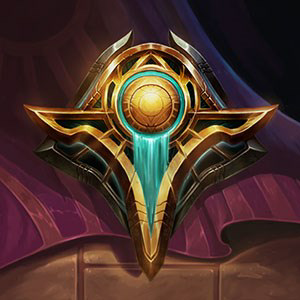

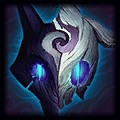

Kindred : 
 - Masterise -> 7  
 - Masterise Points -> 120041
-----------------------------------------------------------------------------


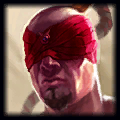

LeeSin : 
 - Masterise -> 7  
 - Masterise Points -> 117723
-----------------------------------------------------------------------------


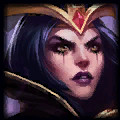

Leblanc : 
 - Masterise -> 6  
 - Masterise Points -> 101963
-----------------------------------------------------------------------------


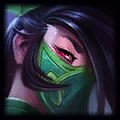

Akali : 
 - Masterise -> 6  
 - Masterise Points -> 98853
-----------------------------------------------------------------------------


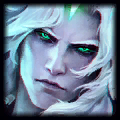

Viego : 
 - Masterise -> 7  
 - Masterise Points -> 97987
-----------------------------------------------------------------------------


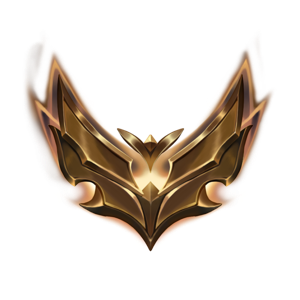

Tier : Gold IV 
 
Win Rate : 52%  | Wins -> 98 | Losses -> 90


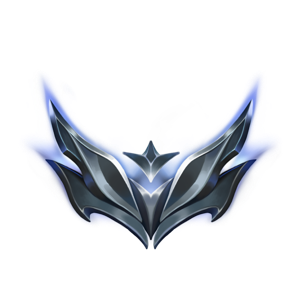

Tier : Silver IV 
 
Win Rate : 53%  | Wins -> 9 | Losses -> 8


In [66]:
def main():
    region = input("Region : ")
    summoner_name = input("Summoner Name")
    summoner = lol_watcher.summoner.by_name(region, summoner_name)
    summoner_name = summoner_name.lower().capitalize()

    display(HTML(f"<div style='text-align: center;'><h1 style='font-size:32px; font-family: Arial, sans-serif; color: #FFA500; text-shadow: 2px 2px #000000; display: inline-block; padding: 10px; border: 2px solid #FFA500;'>{summoner_name}</h1></div>"))

    print_icon(summoner, region)
    print_champ_masterise(summoner, region)
    print_rank_solo_duo(summoner, region)
    print_rank_flex(summoner,region)

main()